# Exercise 1: Robotic arm

Tecnun - UNAV
Winter Course 2019 <p>
drosquete@ceit.es

In this exercise, We will be working with a realistic simulation of the dynamics of a Puma 560 robot arm. It is a popular dataset called pumadyn. The task in these datasets is to predict the angular accelaration of one of the robot arm's links. The inputs include angular positions, velocities and torques of the robot arm<p><p>
<img src="puma560.png" style="width: 30%; height: 30%">
The data is described on the Dataset.Spec. This file can be opened on the regular notepad. Basically there are 32 features and 1 target, the target is the last column.<p><p>
There are 2 files, train and test. The idea is to train the model with the train file and then test the results with the test file.<p>
* The train file contains 5488 observations with 32 features and the target.
* The test file contains 2704 observations with 32 features and the target.

## Activity 1: Load libraries and both files

In [51]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
RobotDF = pd.read_csv('TrainRobot.csv')
Robot_testDF = pd.read_csv('TestRobot.csv')
RobotDF.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,y
0,-0.797998,0.447121,0.380243,0.117830,-1.041022,-0.293277,-0.891368,-0.855013,1.010243,-0.217106,...,1.385095,1.089249,1.602486,0.775241,1.373196,1.661013,1.639060,1.232056,1.469723,-0.020552
1,-0.944419,0.364057,0.764759,-0.530080,-0.447504,-0.232667,-0.400235,0.345077,0.637026,-0.996317,...,0.856366,0.893380,1.394669,1.342807,1.206123,1.352087,0.722806,1.055809,1.336851,-0.029873
2,-0.897078,-0.063778,-0.944688,0.244686,0.101269,-0.081858,0.863327,0.185142,-0.059693,-0.457497,...,1.174465,1.625683,1.100837,1.069771,0.788026,1.007439,1.071244,1.397172,1.412462,0.007890
3,-0.344062,1.014271,-0.680037,-0.580677,0.229017,0.637244,0.470065,-1.042661,0.743729,0.076854,...,0.823909,1.396580,0.923530,0.975266,1.102922,1.465538,0.700508,1.141242,0.810173,-0.013902
4,-0.350509,0.431887,-0.548956,-1.021695,-0.946127,0.234839,-0.467288,-0.663779,-0.019715,0.715396,...,1.012643,1.393008,0.726631,1.294851,1.614226,0.696814,0.994975,1.600896,1.367657,-0.002087


## Activity 2: Split features from target

In [10]:
col = RobotDF.columns
col = col.drop('y')
roX = pd.DataFrame(RobotDF, columns = col)
roY = RobotDF.y

In [11]:
robotModel = linear_model.LinearRegression()
robotModel.fit(roX, roY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
teX = pd.DataFrame(Robot_testDF, columns = Robot_testDF.columns.drop('y'))
teY = Robot_testDF.y

In [23]:
preY = robotModel.predict(teX)
rss = ((preY - teY)*(preY - teY)).sum()
print(robotModel.coef_, robotModel.intercept_)

[ 1.75273766e-04 -2.20101315e-06 -1.02000993e-04  2.97181582e-04
 -1.62504241e-04 -1.27416692e-04  4.22562547e-05 -2.45916961e-05
  2.76195498e-04 -1.49594181e-04 -2.18359986e-05 -7.75747346e-05
 -2.41847670e-05  8.57755122e-06  1.88735369e-06 -8.70117876e-04
 -1.11658428e-06 -6.36288243e-05 -1.81643526e-04 -3.31378106e-04
  2.59574060e-04 -2.99878495e-04  9.94331117e-05  6.79601281e-05
 -1.17595289e-04 -2.20511314e-04 -1.71869627e-04  3.24004117e-04
 -2.22156435e-04 -3.00759239e-04  2.49009683e-04  1.41333229e-04] 0.0008390060966735635


## Question: Which is the feature that has the best score on linear model? Compare 
To answer this question. Take in consideration the following tips:
* You are allowed to use for loop
* There is a function named "score" on the model, use it as the quality metric
* Check each model coefficient and interception
* Plot the best model and the worst model, according to their features

In [22]:
robotModel.score(teX, teY)

0.9271472479985837

In [48]:
scores = []
#using for loop to create single feature model and give the score
for X in range(32):
    trainX = pd.DataFrame(RobotDF, columns = [str(X)])
    singleModel = linear_model.LinearRegression()
    singleModel.fit(trainX, roY)
    print(X, singleModel.score(pd.DataFrame(Robot_testDF, columns = [str(X)]), teY))
    scores = scores + [singleModel.score(pd.DataFrame(Robot_testDF, columns = [str(X)]), teY)]

In [53]:
print(max(scores),min(scores))
#best 15
bestModel = linear_model.LinearRegression()
bestModel.fit(pd.DataFrame(RobotDF, columns = ['15']), roY)
best_pre = bestModel.predict(pd.DataFrame(Robot_testDF, columns = ['15']))
#worst 26
worstModel = linear_model.LinearRegression()
worstModel.fit(pd.DataFrame(RobotDF, columns = ['26']), roY)
worst_pre = worstModel.predict(pd.DataFrame(Robot_testDF, columns = ['26']))

0.9268242247675914 -0.003492741903568186


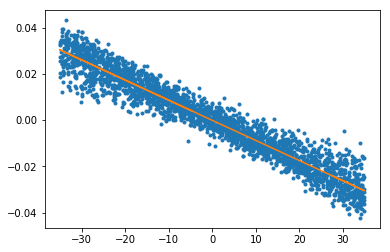

In [54]:
plt.plot(Robot_testDF['15'], Robot_testDF['y'], '.', Robot_testDF['15'], best_pre, '-')

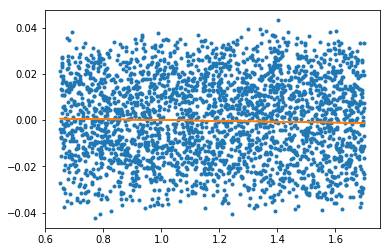

In [55]:
plt.plot(Robot_testDF['26'], Robot_testDF['y'], '.', Robot_testDF['26'], worst_pre, '-')